In [1]:
%matplotlib inline
import sys
print('Python Version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np
print('numpy version: {}'.format(np.__version__))

import scipy as sp
print('scipy version: {}'.format(sp.__version__))

import IPython
print('ipython version: {}'.format(IPython.__version__))

import sklearn
print('scikit-learn version: {}'.format(sklearn.__version__))

import matplotlib.pyplot as plt

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rcParams["font.family"] = 'AppleGothic'

import mglearn

from IPython.display import display

Python Version: 3.5.3 |Anaconda custom (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.20.3
matplotlib version: 2.0.2
numpy version: 1.14.1
scipy version: 0.19.1
ipython version: 6.0.0
scikit-learn version: 0.19.0


In [2]:
!find ./data -type d

./data
./data/aclImdb
./data/aclImdb/test
./data/aclImdb/test/neg
./data/aclImdb/test/pos
./data/aclImdb/train
./data/aclImdb/train/neg
./data/aclImdb/train/pos


In [3]:
!rm -r data/aclImdb/train/unsup

rm: data/aclImdb/train/unsup: No such file or directory


In [15]:
from sklearn.datasets import load_files

reviews_train = load_files('data/aclImdb/train/')
text_train, y_train = reviews_train.data, reviews_train.target
print('text_train의 타입: {}'.format(type(text_train)))
print('test_train의 길이: {}'.format(len(text_train)))
print('text_train[6]:\n{}'.format(text_train[6]))

text_train의 타입: <class 'list'>
test_train의 길이: 25000
text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [16]:
text_train = [doc.replace(b'<br />', b' ') for doc in text_train]

In [17]:
print('클래스별 샘플 수 (훈련 데이터): {}'.format(np.bincount(y_train)))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [18]:
reviews_test = load_files('data/aclImdb/test/')
text_test, y_test = reviews_test.data, reviews_test.target
print('테스트 데이터의 문서 수: {}'.format(len(text_test)))
print('클래스별 샘플 수 (테스트 데이터): {}'.format(np.bincount(y_test)))
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


In [20]:
bards_words = ['The fool doth think he is wise,',
              'but the wise man knows himself to be a fool']

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bards_words)

print('어휘 사전의 크기: {}'.format(len(vect.vocabulary_)))
print('어휘 사전의 내용:\n{}'.format(vect.vocabulary_))

어휘 사전의 크기: 13
어휘 사전의 내용:
{'himself': 5, 'he': 4, 'wise': 12, 'knows': 7, 'doth': 2, 'to': 11, 'is': 6, 'fool': 3, 'but': 1, 'be': 0, 'the': 9, 'think': 10, 'man': 8}


In [9]:
bag_of_words = vect.transform(bards_words)
print('BOW: {}'.format(repr(bag_of_words)))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [10]:
print('BOW의 밀집 표현:\n{}'.format(bag_of_words.toarray()))

BOW의 밀집 표현:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [11]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print('X_train:\n{}'.format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [12]:
feature_names = vect.get_feature_names()
print('특성 개수: {}'.format(len(feature_names)))
print('처음 20개 특성:\n{}'.format(feature_names[:20]))
print('20,010에서 20,030까지 특성:\n{}'.format(feature_names[20010:20030]))
print('매 2,000번째 특성:\n{}'.format(feature_names[::2000]))

특성 개수: 74849
처음 20개 특성:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20,010에서 20,030까지 특성:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2,000번째 특성:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print('교차 검증 평균 점수: {:.3f}'.format(np.mean(scores)))

교차 검증 평균 점수: 0.881


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수: {:.3f}'.format(grid.best_score_))
print('최적의 매개변수: ', grid.best_params_)

최상의 교차 검증 점수: 0.888
최적의 매개변수:  {'C': 0.1}


In [15]:
X_test = vect.transform(text_test)
print('테스트 점수: {:.3f}'.format(grid.score(X_test, y_test)))

테스트 점수: 0.879


In [16]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('min_df로 제한한 X_train: {}'.format(repr(X_train)))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [17]:
feature_names = vect.get_feature_names()

print('처음 50개 특성:\n{}'.format(feature_names[:50]))
print('20,010부터 20,030까지 특성:\n{}'.format(feature_names[20010:20030]))
print('매 700번째 특성:\n{}'.format(feature_names[::700]))

처음 50개 특성:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20,010부터 20,030까지 특성:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 700번째 특성:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient', 'r

In [18]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수: {:.3f}'.format(grid.best_score_))

최상의 교차 검증 점수: 0.888


In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print('불용어 개수: {}'.format(len(ENGLISH_STOP_WORDS)))
print('매 10번째 불용어:\n{}'.format(list(ENGLISH_STOP_WORDS)[::10]))

불용어 개수: 318
매 10번째 불용어:
['nine', 'five', 'himself', 'de', 'became', 'itself', 'was', 'enough', 'thick', 'hasnt', 'what', 'ourselves', 'yet', 'thus', 'even', 'some', 'its', 'beforehand', 'their', 'back', 'herself', 'been', 'thereafter', 'cry', 'everyone', 'latter', 'serious', 'ltd', 'due', 'such', 'on', 'namely']


In [20]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print('불용어가 제거된 X_train:\n{}'.format(repr(X_train)))

불용어가 제거된 X_train:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [21]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수: {:.3f}'.format(grid.best_score_))

최상의 교차 검증 점수: 0.883


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print('최상의 교차 검증 점수: {:.3f}'.format(grid.best_score_))

/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') 

최상의 교차 검증 점수: 0.892


In [23]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())

print('tfidf가 가장 낮은 특성:\n{}'.format(feature_names[sorted_by_tfidf[:20]]))
print('tfidf가 가장 높은 특성:\n{}'.format(feature_names[sorted_by_tfidf[-20:]]))

/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


tfidf가 가장 낮은 특성:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
tfidf가 가장 높은 특성:
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [24]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print('idf가 가장 낮은 특성:\n{}'.format(feature_names[sorted_by_idf[:100]]))

idf가 가장 낮은 특성:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


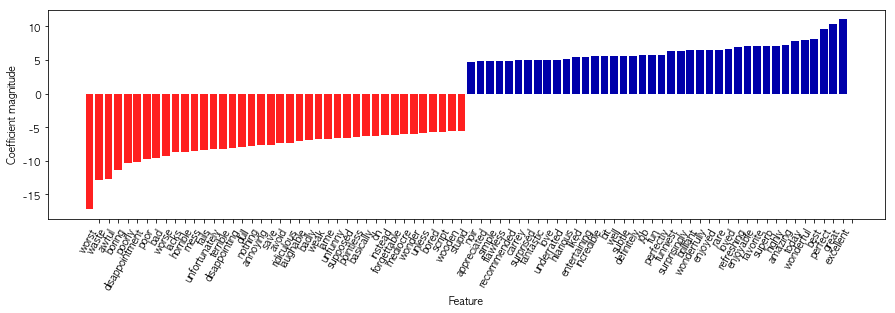

In [25]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_[0],
                                    feature_names, n_top_features=40)

In [26]:
print('bards_words:\n{}'.format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [27]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print('어휘 사전 크기: {}'.format(len(cv.vocabulary_)))
print('어휘 사전:\n{}'.format(cv.get_feature_names()))

어휘 사전 크기: 13
어휘 사전:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [28]:
cv = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print('어휘 사전 크기: {}'.format(len(cv.vocabulary_)))
print('어휘 사전:\n{}'.format(cv.get_feature_names()))

어휘 사전 크기: 14
어휘 사전:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [29]:
print('변환된 데이터 (밀집 배열):\n{}'.format(cv.transform(bards_words).toarray()))

변환된 데이터 (밀집 배열):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [30]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print('어휘 사전 크기: {}'.format(len(cv.vocabulary_)))
print('어휘 사전:\n{}'.format(cv.get_feature_names()))

어휘 사전 크기: 39
어휘 사전:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [31]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print('최상의 교차 검증 점수: {:.3f}'.format(grid.best_score_))
print('최적의 매개변수:\n{}'.format(grid.best_params_))

/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') 

최상의 교차 검증 점수: 0.906
최적의 매개변수:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


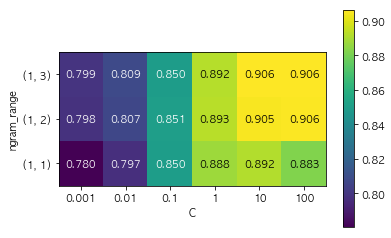

In [32]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
heatmap = mglearn.tools.heatmap(scores, xlabel='C', ylabel='ngram_range', cmap='viridis', fmt='%.3f',
                               xticklabels=param_grid['logisticregression__C'],
                               yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

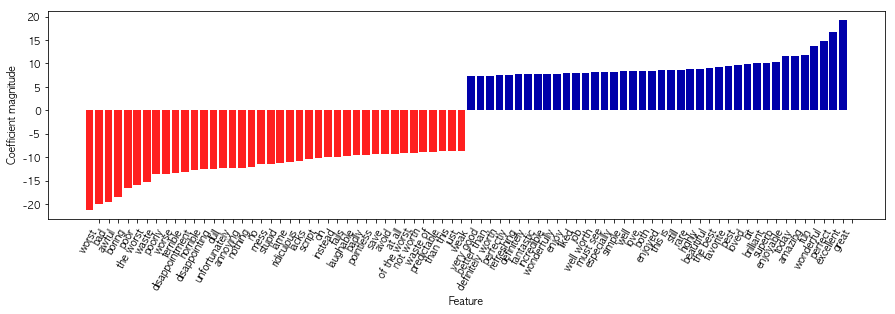

In [33]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

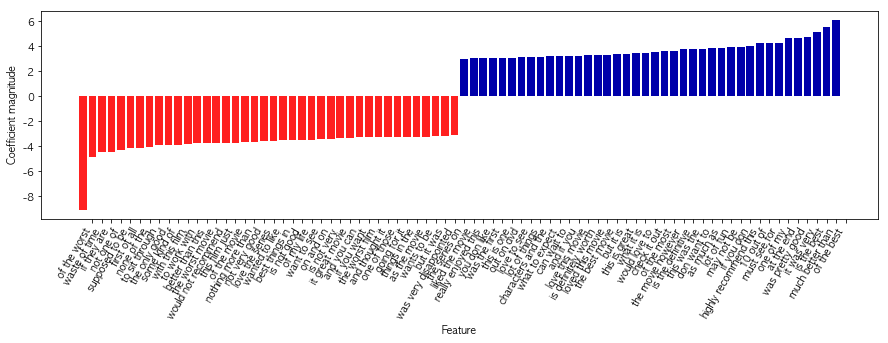

In [34]:
mask = np.array([len(feature.split(' ')) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=40)

In [36]:
import spacy
import nltk

en_nlp = spacy.load('en')
stemmer = nltk.stem.PorterStemmer()

def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print('표제어:')
    print([token.lemma_ for token in doc_spacy])
    print('어간:')
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [37]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                     "I'm scared of meeting the clients tomorrow.")

표제어:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [44]:
import re

regexp = re.compile('(?u)\\b\\w\\w+\\b')

en_nlp = spacy.load('en', disable=['ner'])
en_nlp.remove_pipe('parser')
old_tokenizer = en_nlp.tokenizer
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))

def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [ ]:
X_train_lemma = lemma_vect.fit_transform(text_train)
print('X_train_lemma.shape: {}'.format(X_train_lemma.shape))

vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('X_train.shape: {}'.format(X_train.shape))

In [2]:
df_train  = pd.read_csv('data/ratings_train.txt', delimiter='\t', keep_default_na=False)
df_train.head(n=3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [3]:
text_train = df_train['document'].as_matrix()
y_train = df_train['label'].as_matrix()

In [4]:
df_test = pd.read_csv('data/ratings_test.txt', delimiter='\t', keep_default_na=False)
text_test = df_test['document'].as_matrix()
y_test = df_test['label'].as_matrix()

In [5]:
len(text_train), np.bincount(y_train)

(150000, array([75173, 74827]))

In [6]:
len(text_test), np.bincount(y_test)

(50000, array([24827, 25173]))

In [7]:
from konlpy.tag import Twitter
twitter_tag = Twitter()

In [8]:
def twitter_tokenizer(text):
    return twitter_tag.morphs(text)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

twit_param_grid = {'tfidfvectorizer__min_df': [3, 5, 7],
                  'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)],
                  'logisticregression__C': [0.1, 1, 10]}
twit_pipe = make_pipeline(TfidfVectorizer(tokenizer=twitter_tokenizer), LogisticRegression())
twit_grid = GridSearchCV(twit_pipe, twit_param_grid)

twit_grid.fit(text_train[0:1000], y_train[0:1000])
print('최상의 교차 검증 점수: {:.3f}'.format(twit_grid.best_score_))
print('최적의 교차 검증 매개변수: ', twit_grid.best_params_)

/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') 

최상의 교차 검증 점수: 0.727
최적의 교차 검증 매개변수:  {'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 1), 'logisticregression__C': 1}


/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [11]:
X_test_konlpy = twit_grid.best_estimator_.named_steps['tfidfvectorizer'].transform(text_test)
score = twit_grid.best_estimator_.named_steps['logisticregression'].score(X_test_konlpy, y_test)
print('테스트 세트 점수: {:.3f}'.format(score))

테스트 세트 점수: 0.721


/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [12]:
from konlpy.tag import Mecab

mecab = Mecab()
def mecab_tokenizer(text):
    return mecab.morphs(text)

In [13]:
mecab_param_grid = {'tfidfvectorizer__min_df': [3, 5, 7],
                   'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)],
                   'logisticregression__C': [0.1, 1, 10, 100]}
mecab_pipe = make_pipeline(TfidfVectorizer(tokenizer=mecab_tokenizer), LogisticRegression())
mecab_grid = GridSearchCV(mecab_pipe, mecab_param_grid)

mecab_grid.fit(text_train, y_train)
print('최상의 교차 검증 점수: {:.3f}'.format(mecab_grid.best_score_))
print('최적의 교차 검증 매개변수: ', mecab_grid.best_params_)

/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') 

최상의 교차 검증 점수: 0.869
최적의 교차 검증 매개변수:  {'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 3), 'logisticregression__C': 10}


In [14]:
X_test_mecab = mecab_grid.best_estimator_.named_steps['tfidfvectorizer'].transform(text_test)
score = mecab_grid.best_estimator_.named_steps['logisticregression'].score(X_test_mecab, y_test)
print('테스트 세트 점수: {:.3f}'.format(score))

테스트 세트 점수: 0.875


/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [22]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [24]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0)
document_topics = lda.fit_transform(X)

In [25]:
print('lda.components_.shape: {}'.format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [26]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [27]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [28]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     performance   excellent     
suspense      awful         hitler        gets          young         role          highly        
horror        boring        nazi          guy           old           actor         amazing       
atmosphere    horrible      midnight      around        romantic      cast          wonderful     
mystery       stupid        joe           down          between       play          truly         
house         thing         germany       kill          romance       actors        superb        
director      terrible      years         goes          wonderful     performances  actors        
quite         script        history       killed        heart         played        brilliant     
bit       

In [29]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b'.'.join(text_train[i].split(b'.')[:2]) + b'.\n')

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

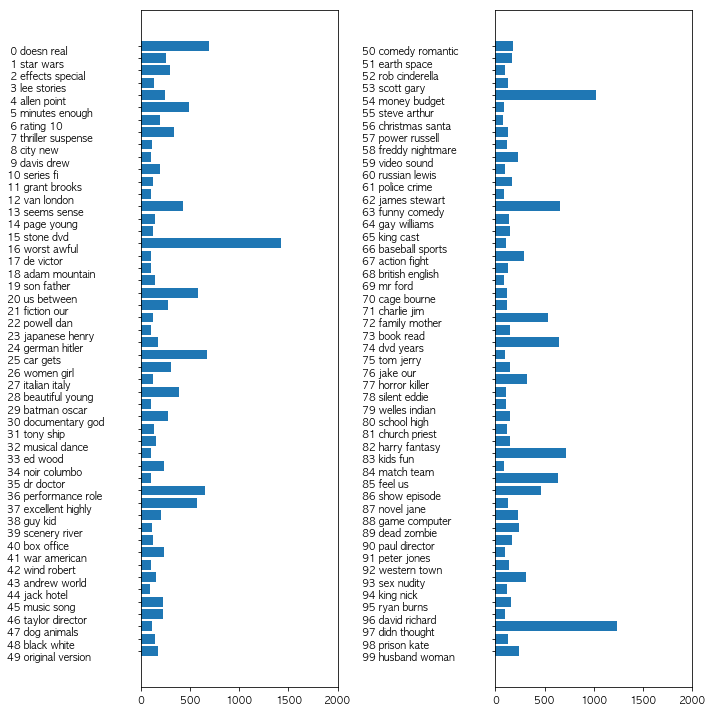

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ['{:>2} '.format(i) + ' '.join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()